<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot. 
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [206]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [207]:
# Loading the image into a N*N matrix using numpy array method
image = np.array(Image.open('../../Images/lemon.jpeg'))
# print(image[0][99],image.shape) # Observing the values of the image array 

## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image 
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





(100, 100, 3)
[13 14 14 14 14 14 14 13 14 13 13 11  9 10  9  9 10 10 10 10 10 10 10 10
 10 10 10 10 10  9  9  9 10 10  9  8  8  7  7  7  8  8  9  8  7  7  8  9
  6  6  6  7  8  9 10 11 10 10 10 10 11 11 12 13 15 15 15 16 17 17 18 18
 18 18 19 21 21 19 18 22 22 23 24 24 27 27 25 23 25 25 25 25 27 27 30 30
 30 32 33 32]
(100, 100)


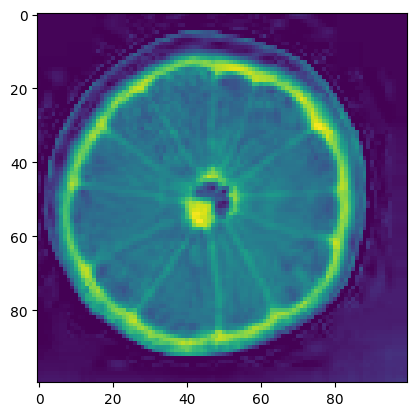

In [208]:
print(image.shape)
# extracting the height and width from all rows and colomns and fetching the blue color channel as last color channel 
img_single_channel = image[:,:,-1]
print(img_single_channel[99])
print(img_single_channel.shape)
plt.imshow(img_single_channel)
plt.show()

## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

Shape of img_average_channel: (100, 100)


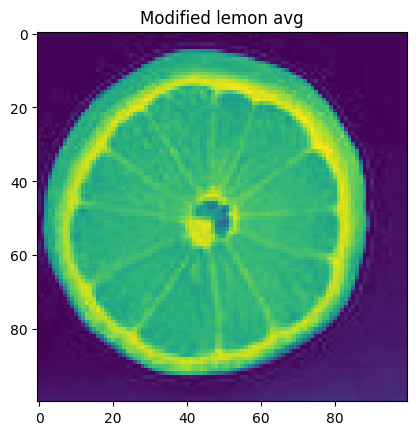

In [209]:
# computing the average of three colors, in numpy the 3d array is represented as (n(dimensions),m(rows),x(columns)) 
# Using axis 2, I am computing the average of all the three colorts and storing the resultant data into the average_channel variable.
img_average_channel = np.mean(image, axis=2)
# print(img_average_channel)
print("Shape of img_average_channel:", img_average_channel.shape)
# After computing the mean I am plotting the resultant array into fiugure.
# Observation: The image representation has been improved after computing the mean of 
plt.imshow(img_average_channel)
plt.title("Modified lemon avg")
# plt.axis('off')
plt.show()

## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

`Identity matrix`

An identity matrix is denoted by In, where it has n rows and n coloums all the entries apart from diagonal from upper left to bottom right are zero. 

Multiplying, a matrix with In results to an original matrix.


In [210]:
from random import randint
len_image = len(img_average_channel)
identity_matrix = np.identity(len_image,like=img_average_channel)
print(identity_matrix[randint(0,len_image)])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`. 

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [211]:
rows = np.arange(0,len_image)
np.random.shuffle(rows)
print(rows)

[89 62 71 96  0 78 13 27 57 73 83 79 42 49 30 92 53 95 28 60 88 15 64 94
 54 51 55 25 11 68 44 19 29 84 33 98 16 39 22 52 87 97 50 81 46 37 61 99
 69 26 43  4 82 48 12  3 86 74  5 58 32  7  8  2 65 35 75 90 85 67 18 45
 59 23 40 38 41 66 17  6 93 63  1 24 56 76 77 72  9 10 31 70 91 34 14 36
 47 21 80 20]


## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


In [212]:
T = np.copy(identity_matrix)
for i in range(len_image):
    T[i] = identity_matrix[rows[i]]
# verifying the T for a successfull copy
# print(T[randint(0,10)])
# Here, I am creating a duplicate of identity matrix where diagonals are swapped with the other rows as per the shuffling defined above.
# By multpying the matrix T (scrambled) with the img_average_channel the img_average values will be changed therefore the image will be scrambled.
print(T.shape)

(100, 100)


## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see. 
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image. 

(100, 100)


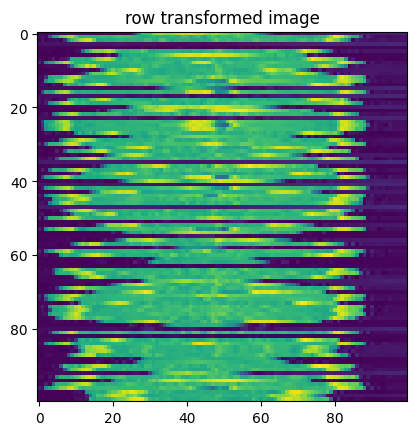

In [213]:
# The matrix multiplication of two matrices yields to a matrix where the original values are changed based on the 1's (activations) in the scrambled inverse matrix 
row_transformed_image = np.matmul(T,img_average_channel)
print(row_transformed_image.shape)
plt.imshow(row_transformed_image)
plt.title("row transformed image")
# plt.axis('off')
plt.show()

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

Determinant of T is 1.0 therefore its invertible


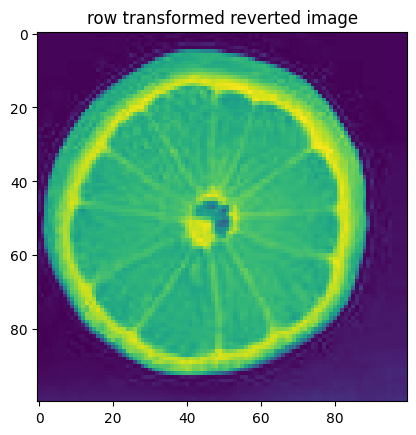

In [214]:
# For a matrix to be invertible its determinant must not be equal to 0 (det != 0) 
# If det != 0 then matrix is said to be invertible A*A-1 = I or A-1*A = I
det_t = np.linalg.det(T)
if det_t != 0:
    print('Determinant of T is {} therefore its invertible'.format(det_t))
Tinv = np.linalg.inv(T)
# print(Tinv[1])
# If I use the inverted matrix, and then do the matrix multiplication this will yeild the original image as output
inverse = np.matmul(Tinv,row_transformed_image)
plt.imshow(inverse)
plt.title("row transformed reverted image")
# plt.axis('off')
plt.show()

## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


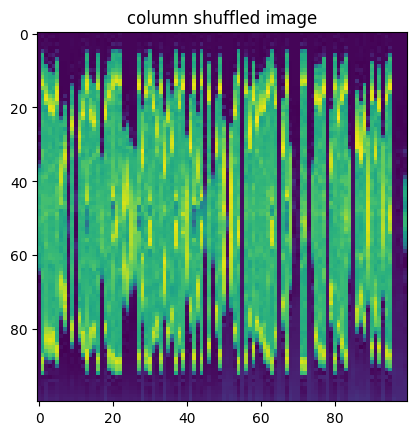

In [215]:
# Making a copy of the identity matrix inorder to swap the columns of the I matrix with the scrambled index using rows array.
T_col = np.copy(identity_matrix)
# T_col = T_col[:,rows]
# print(T_col.shape,rows)
# Selecting two coloums where one being the iteration index and other being a random index over 100*100 matrix and performing swap operation
for i in range(len_image):
    T_col[:,[i,rows[i]]] = T_col[:,[rows[i],i]]
# After performing the swap over the columns doing matrix multiplication to produce the scrambled image with columns 
transformed_col_image = np.matmul(img_average_channel,T_col)
# plotting the scrambled image 
plt.imshow(transformed_col_image)
plt.title("column shuffled image")
plt.show()

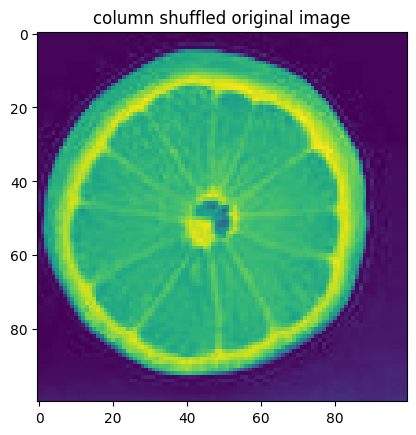

In [216]:
# calculating the inverse of the scrambled identity matrix
T_col_inv = np.linalg.inv(T_col)
# Reverting the previous matrix multiplication using the inverse of T_col_inv 
inverse_col = np.matmul(transformed_col_image,T_col_inv)
# plotting the reconstructed image
plt.imshow(inverse_col)
plt.title("column shuffled original image")
plt.show()

## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image. 

Shape of img_average_channel: (100, 100)


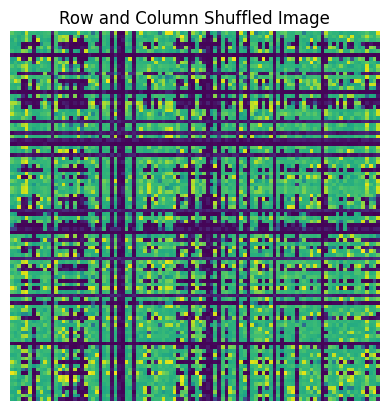

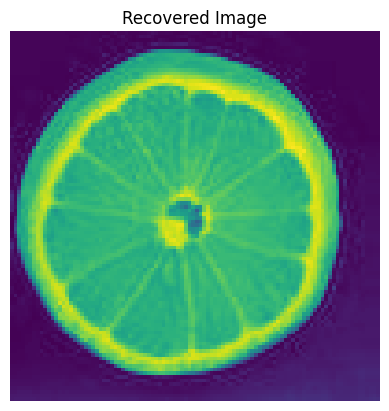

In [217]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the average channel of the image (assuming it's a color image)
img_average_channel = np.mean(image, axis=2)

# Print the shape of img_average_channel
print("Shape of img_average_channel:", img_average_channel.shape)

# Get the length (number of rows/columns) of img_average_channel
len_image = len(img_average_channel)

# Create an identity matrix of the same size as img_average_channel
identity_matrix = np.identity(len_image)

# Generate a random permutation of indices for shuffling
scramble_indexs = np.arange(0, len_image)
np.random.shuffle(scramble_indexs)

# Create copies of the identity matrix for row and column shuffling
identity_rows = np.copy(identity_matrix)
identity_cols = np.copy(identity_matrix)

# Shuffle the rows based on the scramble_indexs
T_rows = identity_rows[scramble_indexs]

# Shuffle the columns based on the scramble_indexs
T_cols = identity_cols[:, scramble_indexs]

# Perform row and column shuffling on img_average_channel
row_col_scramble_image = np.matmul(np.matmul(T_rows, img_average_channel), T_cols)

# Display the shuffled image
plt.imshow(row_col_scramble_image)
plt.title("Row and Column Shuffled Image")
plt.axis('off')
plt.show()

# Calculate the inverse transformations for row and column shuffling
T_rows_inv = np.linalg.inv(T_rows)
T_cols_inv = np.linalg.inv(T_cols)

# Recover the original image by applying inverse transformations
recovered_image = np.matmul(np.matmul(T_rows_inv, row_col_scramble_image), T_cols_inv)

# Display the recovered image
plt.imshow(recovered_image)
plt.title("Recovered Image")
plt.axis('off')
plt.show()
